In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import librosa
import numpy as np
import librosa.display
import soundfile as sf
import matplotlib.pyplot as plt
import IPython.display as ipd

%matplotlib inline

In [3]:
def show_wave(wave, sr, lines=[]):
    fig, ax = plt.subplots(figsize=(10, 5))
    for line in lines:
        ax.axvline(x=line, c='red')
    librosa.display.waveplot(wave, sr=sr, ax=ax)
    ax.set(title='Waveform')
    ax.label_outer()


def show_spec(dbs):
    fig, ax = plt.subplots(figsize=(10, 5))

    w, h = dbs.shape
    img = ax.imshow(dbs, extent=[0,h,0,w], aspect='auto')
    ax.set_title('Power spectrogram', size=14)
    fig.colorbar(img, ax=ax, format="%+2.0f dB")

    plt.show()

In [4]:
wave, sr = sf.read("data/noised_piano.wav", dtype=np.float32)

In [5]:
win_len = int(sr * 0.05)
hop_len = win_len // 4

In [6]:
ipd.display(ipd.Audio(wave, rate=sr))

In [7]:
spec = np.abs(librosa.stft(wave, n_fft=win_len, win_length=win_len, hop_length=hop_len, window="hann"))
dbs = librosa.amplitude_to_db(spec, ref=np.max)

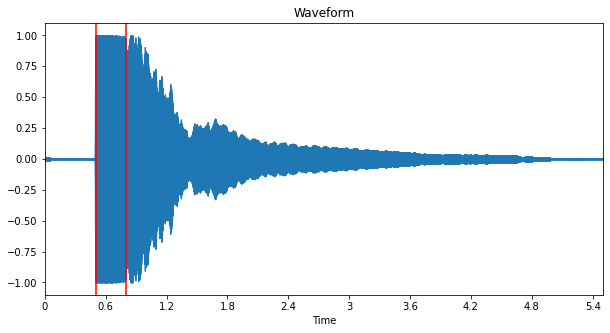

In [8]:
show_wave(wave, sr, lines=[0.5, 0.8])

In [9]:
show_spec(dbs)

In [10]:
dbs.min(), dbs.max()

(-80.0, 0.0)

In [11]:
dbs[dbs <= -60] = -80.

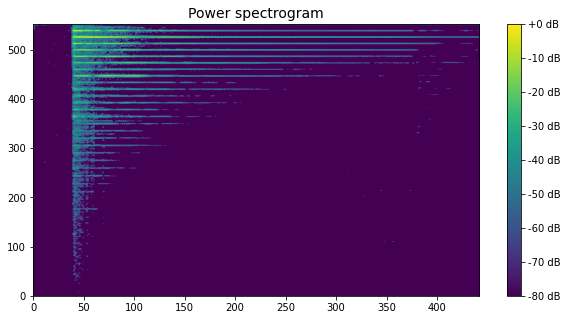

In [12]:
show_spec(dbs)